## Hometask 

1) Classify the signs (fingers)  dataset 

2) Try to change the number of hidden layer 

3) Change the activation to tanh or sigmoid and see what happens

4) Change the dropout ratio and check the performance

In [206]:
# !wget https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0 -O /content/sample_data/train_signs.h5
# !wget https://www.dropbox.com/s/1doojr76evzroet/test_signs.h5?dl=0 -O /content/sample_data/test_signs.h5


In [207]:
import numpy as np 
import matplotlib.pyplot as plt

In [208]:

import h5py
def load_dataset():
    fn =   'train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn ='test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes
train_data, train_labels, test_data, test_labels, classes = load_dataset()

print ('train_data.shape=', train_data.shape)
print ('train_labels.shape=',  train_labels.shape)
print ('test_data.shape=', test_data.shape)
print ('test_labels.shape=', test_labels.shape)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1, 1080)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (1, 120)


In [209]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

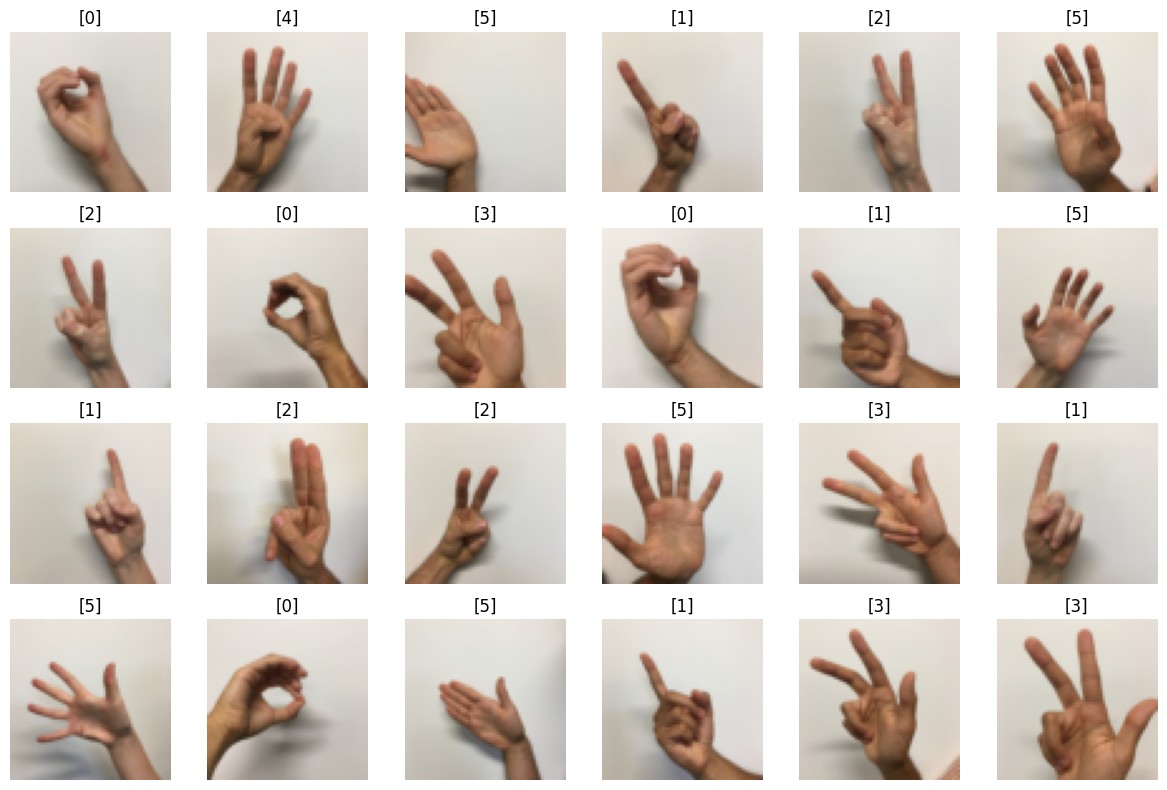

In [210]:
plt.figure(figsize= (12,8))
display_samples_in_grid(train_data, n_rows=4, n_cols=6, y= train_labels.T)
plt.tight_layout(h_pad=1, w_pad=1)

In [211]:
# X_train = train_data.reshape(train_data.shape[0], train_data.shape[1],train_data.shape[2],1)
# X_test =test_data.reshape(test_data.shape[0], test_data.shape[1],test_data.shape[2],1)
X_train = train_data
X_test = test_data
Y_train = train_labels.reshape(train_labels.shape[1],)
Y_test = test_labels.reshape(test_labels.shape[1],)

In [212]:
# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
# Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255

X_train.shape, Y_train.shape

((1080, 64, 64, 3), (1080,))

In [213]:
#%pip install tensorflow

In [214]:
from tensorflow.keras.utils import to_categorical

In [215]:
# Change the labels from integer to categorical data
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)
 
# Display the change for category label using one-hot encoding
print('Original label [0] : ', Y_train[0])
print('After conversion to categorical ( one-hot ) : ', Y_train_one_hot[0])

Original label [0] :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1.]


In [216]:
classes = np.unique(Y_train)
nClasses = len(classes)

In [217]:
from keras.models import Sequential
import keras.layers as kl
import keras
 
model = Sequential()
model.add(kl.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(kl.Dropout(0.25))
model.add(kl.MaxPooling2D((2,2)))
model.add(kl.Dropout(0.25))
model.add(kl.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(kl.MaxPooling2D((2,2)))
model.add(kl.Dropout(0.25))
model.add(kl.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(kl.Flatten())
model.add(kl.Dense(64, activation='relu'))
model.add(kl.Dropout(0.25))
model.add(kl.Dense(nClasses, activation='softmax')) 

In [218]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [219]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_35 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_63 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                               

In [220]:
history = model.fit(X_train, Y_train_one_hot, batch_size=64, epochs=40, verbose=1, 
                   validation_data=(X_test, Y_test_one_hot))

Epoch 1/40


17/17 [==============================] - 6s 277ms/step - loss: 1.9610 - accuracy: 0.1509 - val_loss: 1.7895 - val_accuracy: 0.2750
Epoch 2/40
17/17 [==============================] - 4s 210ms/step - loss: 1.7855 - accuracy: 0.1972 - val_loss: 1.7812 - val_accuracy: 0.2667
Epoch 3/40
17/17 [==============================] - 4s 205ms/step - loss: 1.7565 - accuracy: 0.2333 - val_loss: 1.7507 - val_accuracy: 0.2250
Epoch 4/40
17/17 [==============================] - 3s 205ms/step - loss: 1.6680 - accuracy: 0.3139 - val_loss: 1.6487 - val_accuracy: 0.3750
Epoch 5/40
17/17 [==============================] - 4s 230ms/step - loss: 1.4918 - accuracy: 0.4028 - val_loss: 1.4040 - val_accuracy: 0.5667
Epoch 6/40
17/17 [==============================] - 4s 206ms/step - loss: 1.2828 - accuracy: 0.5074 - val_loss: 1.2031 - val_accuracy: 0.5833
Epoch 7/40
17/17 [==============================] - 3s 202ms/step - loss: 1.0695 - accuracy: 0.6028 - val_loss: 0.9926 - val_accuracy: 0.7500
Epoch 8/40
17/17 

In [221]:
[test_loss, test_acc] = model.evaluate(X_test, Y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

4/4 [==============================] - 0s 16ms/step - loss: 0.2235 - accuracy: 0.9417
Evaluation result on Test Data : Loss = 0.22349189221858978, accuracy = 0.9416666626930237


In [222]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy Curves')

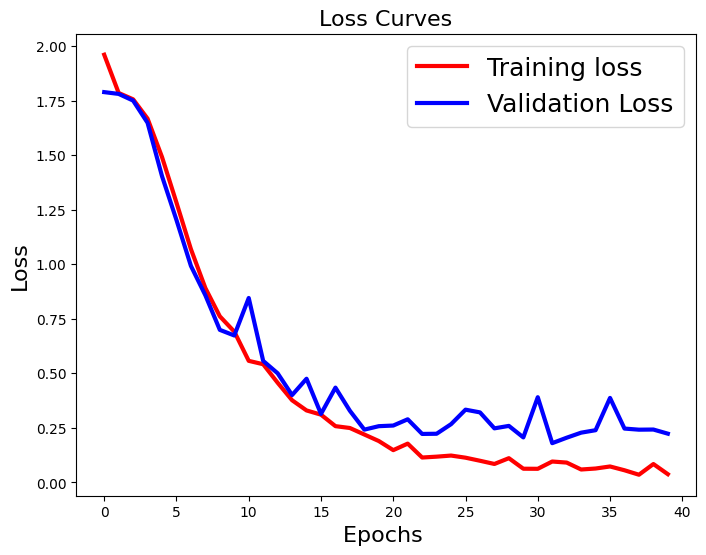

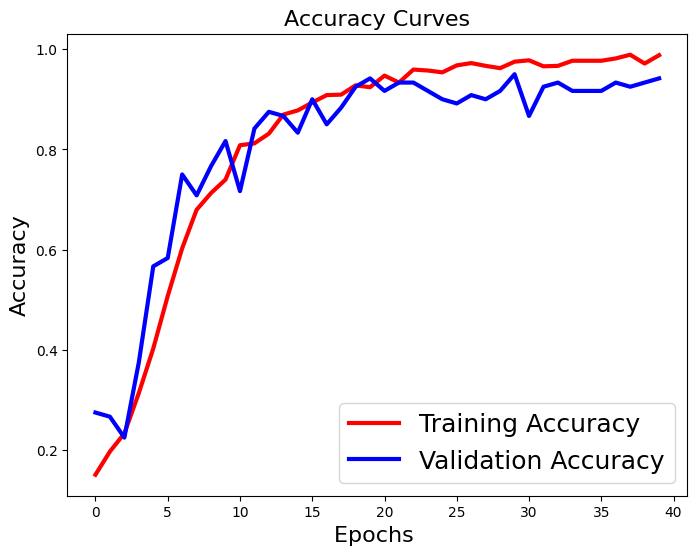

In [223]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### Without Dropout layers

In [224]:
model = Sequential()
model.add(kl.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
#model.add(kl.Dropout(0.25))
model.add(kl.MaxPooling2D((2,2)))
#model.add(kl.Dropout(0.25))
model.add(kl.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(kl.MaxPooling2D((2,2)))
#model.add(kl.Dropout(0.25))
model.add(kl.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(kl.Flatten())
model.add(kl.Dense(64, activation='relu'))
#model.add(kl.Dropout(0.25))
model.add(kl.Dense(nClasses, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, Y_train_one_hot, batch_size=64, epochs=40, verbose=1, 
                   validation_data=(X_test, Y_test_one_hot))

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_21 (Flatten)        (None, 9216)            

In [225]:
[test_loss, test_acc] = model.evaluate(X_test, Y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

4/4 [==============================] - 0s 13ms/step - loss: 0.3644 - accuracy: 0.9333
Evaluation result on Test Data : Loss = 0.36440303921699524, accuracy = 0.9333333373069763


Text(0.5, 1.0, 'Accuracy Curves')

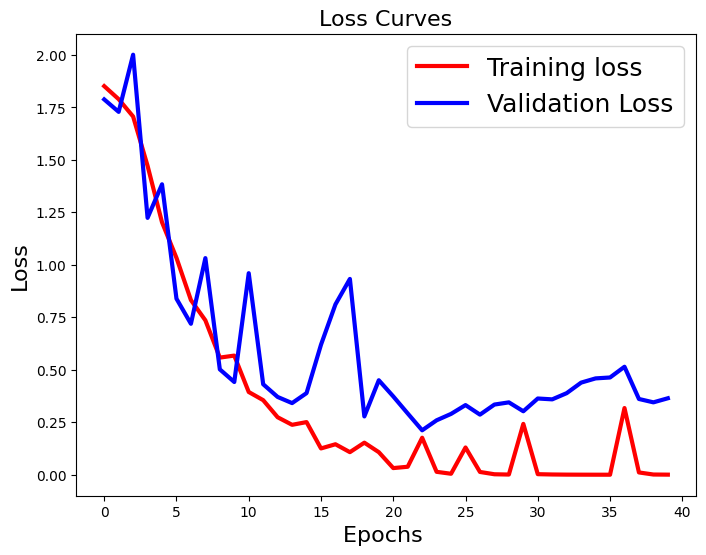

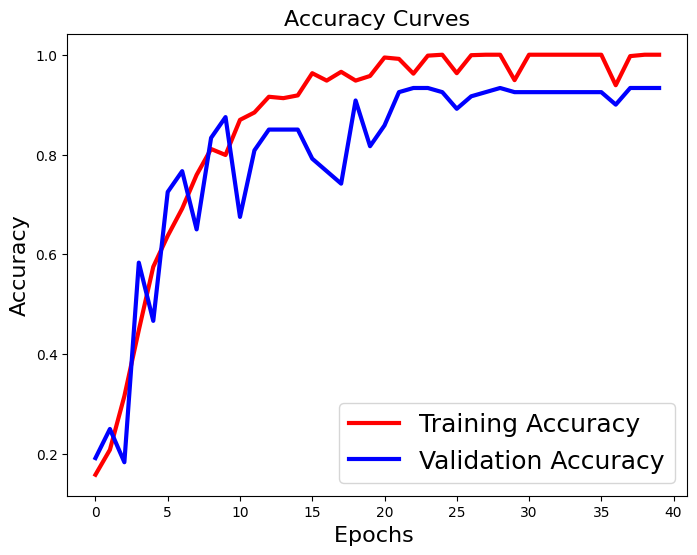

In [226]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

#### Sigmoid activation

In [227]:
model = Sequential()
model.add(kl.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(kl.Dropout(0.25))
model.add(kl.MaxPooling2D((2,2)))
model.add(kl.Dropout(0.25))
model.add(kl.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(kl.MaxPooling2D((2,2)))
model.add(kl.Dropout(0.25))
model.add(kl.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(kl.Flatten())
model.add(kl.Dense(64, activation='tanh'))
model.add(kl.Dropout(0.25))
model.add(kl.Dense(nClasses, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, Y_train_one_hot, batch_size=64, epochs=35, verbose=1, 
                   validation_data=(X_test, Y_test_one_hot))


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_39 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_69 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                               

In [228]:
[test_loss, test_acc] = model.evaluate(X_test, Y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

4/4 [==============================] - 0s 24ms/step - loss: 0.2695 - accuracy: 0.8917
Evaluation result on Test Data : Loss = 0.2695331573486328, accuracy = 0.8916666507720947


Text(0.5, 1.0, 'Accuracy Curves')

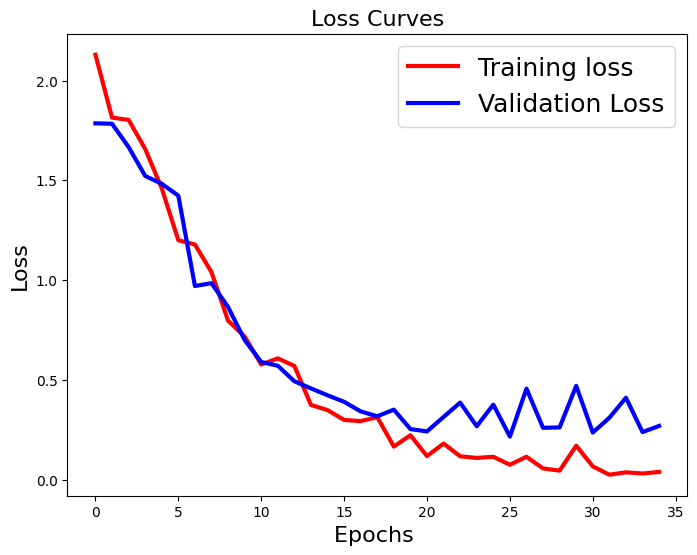

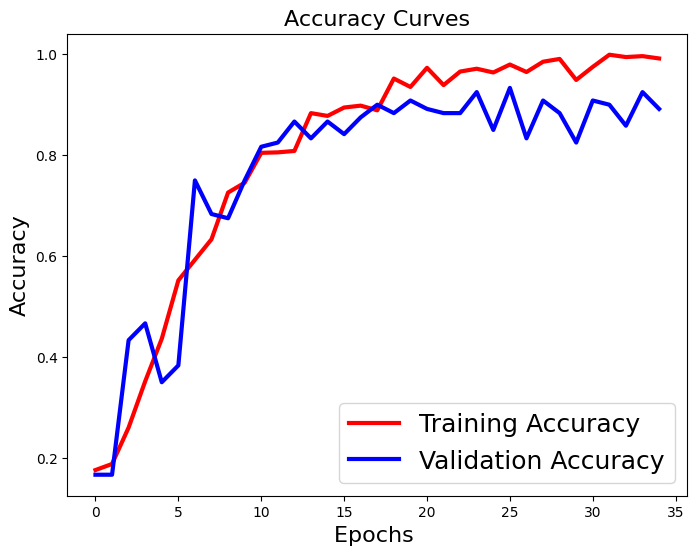

In [229]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)